In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

In [ ]:
%cd gdrive/MyDrive

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
import os

folder_path = "G:/Praxis/Capp"
folder_contents = os.listdir(folder_path)

for item in folder_contents:
    print(item)

NotOkChatbox
NotOkEmail
Ok


In [3]:
import pathlib
import PIL.Image

In [4]:
data_dir = pathlib.Path('G:/Praxis/Capp')  # Replace with the path to your local directory containing the images
print(data_dir)
# images = list(data_dir.glob('/content/gdrive/MyDrive/CAPP_Version3/NotOkChatbox/*'))
# print(images[1])
# PIL.Image.open(str(images[1]))


G:\Praxis\Capp


In [5]:
import tensorflow as tf

img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4051 files belonging to 3 classes.
Using 3241 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4051 files belonging to 3 classes.
Using 810 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['NotOkChatbox', 'NotOkEmail', 'Ok']


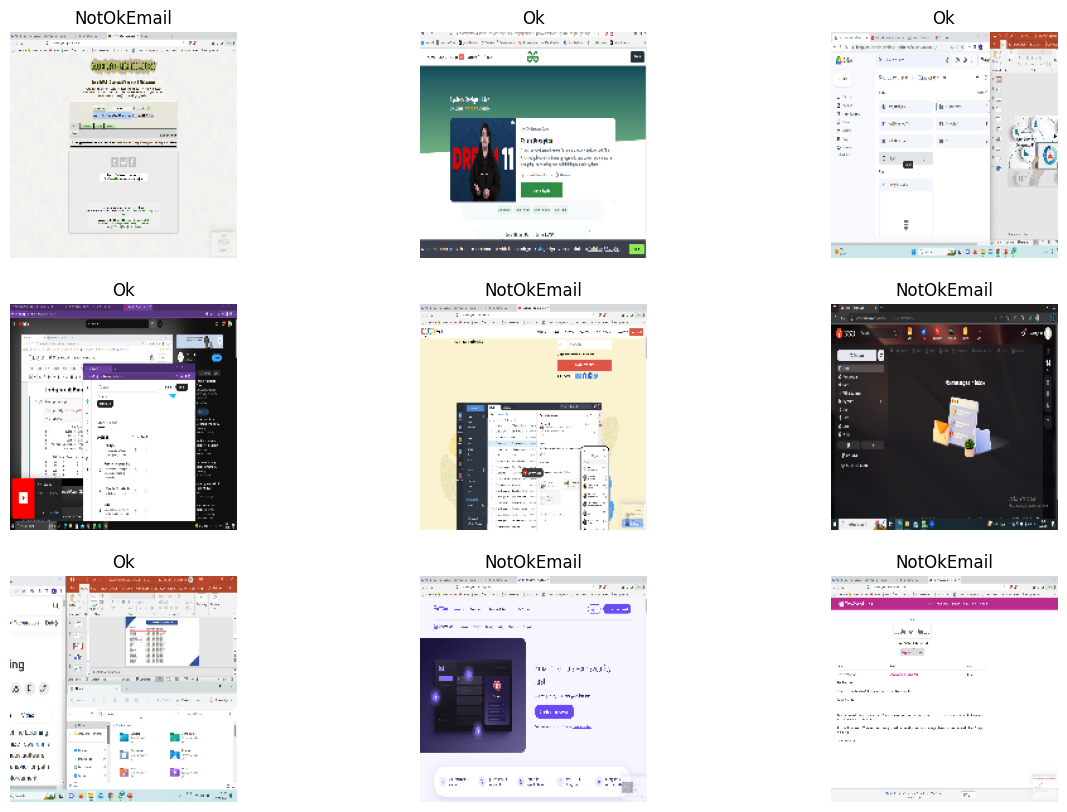

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#RestNet 18

In [10]:
pip install torchvision


Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install control

Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, random_split

In [2]:
# Define data transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [3]:
# Load the dataset using ImageFolder
dataset = torchvision.datasets.ImageFolder(root='G:/Praxis/Capp', transform=transform)

##Train_Test_Validation Split

# New section

In [4]:
# Split dataset into training, validation, and testing sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
#test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [5]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
#test_loader = DataLoader(, batch_size=32, shuffle=True)


In [6]:
# Define the model
model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 3)

C:\Users\user\anaconda3\envs\tf\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\user\anaconda3\envs\tf\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [8]:
%%time
# Train the model
for epoch in range(5):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1,10, loss.item()))

Epoch [1/10], Loss: 3.9772
Epoch [2/10], Loss: 1.7055
Epoch [3/10], Loss: 0.8781
Epoch [4/10], Loss: 0.7282
Epoch [5/10], Loss: 0.7696
CPU times: total: 3h 11min 20s
Wall time: 32min 20s


In [ ]:
pip install -U scikit-learn

In [9]:
    # Evaluate the model on validation set
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true += labels.numpy().tolist()
            y_pred += predicted.numpy().tolist()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the validation set: {} %'.format(100 * correct / total))

    # Print confusion matrix and classification report
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred, target_names=dataset.classes)
    print('Confusion Matrix:\n', cm)
    print('Classification Report:\n', cr)



Accuracy of the network on the validation set: 78.54500616522812 %
Confusion Matrix:
 [[ 65  28  34]
 [ 34 382  39]
 [ 11  28 190]]
Classification Report:
               precision    recall  f1-score   support

NotOkChatbox       0.59      0.51      0.55       127
  NotOkEmail       0.87      0.84      0.86       455
          Ok       0.72      0.83      0.77       229

    accuracy                           0.79       811
   macro avg       0.73      0.73      0.73       811
weighted avg       0.79      0.79      0.78       811



In [ ]:
conda install pandas

In [ ]:
pip install seaborn

In [10]:
import pandas as pd
import seaborn as sns

cm_df = pd.DataFrame(cm, index=dataset.classes, columns=dataset.classes)

In [ ]:
pip install plotly

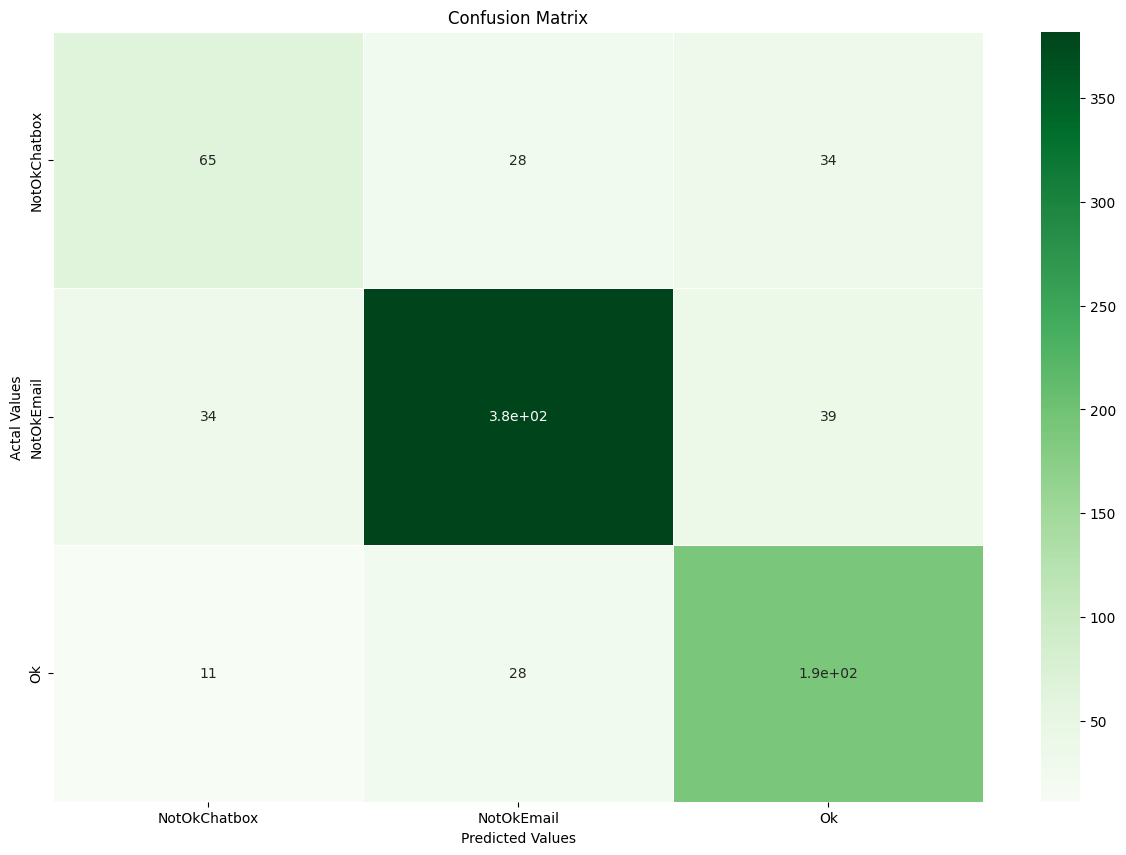

In [11]:
import matplotlib.pyplot as plt
#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True, linewidth=.5, cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [12]:
# Save the trained model
torch.save(model.state_dict(), 'model_restnet_18.pth')


In [13]:
torch.load('model_restnet_18.pth')

OrderedDict([('conv1.weight',
              tensor([[[[-5.8682e-02, -9.5323e-02, -1.0634e-01,  ...,  9.3236e-02,
                         -8.2380e-03, -6.3598e-02],
                        [-3.4398e-02, -6.1616e-02, -2.0106e-01,  ..., -2.2761e-01,
                         -1.2754e-01, -1.6506e-02],
                        [ 6.1616e-02,  1.1495e-01,  4.0618e-01,  ...,  7.1704e-01,
                          4.3681e-01,  2.4234e-01],
                        ...,
                        [-9.6983e-02, -1.3208e-01, -1.7963e-02,  ..., -3.9691e-01,
                         -4.5143e-01, -3.3112e-01],
                        [-4.8310e-02, -5.9351e-02,  2.4109e-02,  ...,  4.2538e-01,
                          4.4456e-01,  2.0238e-01],
                        [-3.1598e-03, -7.5970e-03,  5.4003e-03,  ..., -7.0133e-02,
                          5.2903e-04,  7.4602e-02]],
              
                       [[ 1.6150e-02, -3.3526e-02, -7.2945e-02,  ...,  1.4948e-01,
                          5.4520

In [17]:

import torch
#state_dict = torch.load('model_restnet_18.pth')
#print(state_dict.keys())
# Load the saved model
#model.load_state_dict(state_dict)
model= torch.load('model_restnet_18.pth')

# Set the model to evaluation mode
import torchvision.models as models

# Load pre-trained ResNet-18 model

# Set the model to evaluation mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
pip install pyautogui


In [28]:
import pyautogui
import time
import datetime
from PIL import Image
import torchvision.transforms as transforms
import io


start_time = datetime.datetime.now()

while True:
    # Capture screenshot
    screenshot = pyautogui.screenshot()
    screenshot.show()
    # Preprocess the image as required by your model
    preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
    screenshot_tensor = preprocess(screenshot)
    # Do something with the output
    model = models.resnet18(pretrained=True)
    
    # Modify the model architecture
    model.fc = torch.nn.Sequential(
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 1)
    )
    model.eval()
    # Convert the screenshot to a PIL Image object
    image = Image.frombytes('RGB', screenshot.size, screenshot.tobytes())

    # Apply transformations to the image
    image = transform(image)

    # Add batch dimension to the image
    image = image.unsqueeze(0)

    # Pass the image through the model to get predictions
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    # Map predicted class index to label
    class_labels = ['NotOkChatbox','NotOkEmail','Ok']
    predicted_label = class_labels[predicted.item()]

    # If not OK, display error message and save the image
    if predicted_label != 'Ok':
        print(f"Error: {predicted_label} detected")
        # Save the image to disk or do further processing
        # image.save(f"{predicted_label}.png")
    else:
        print("Image classified as OK")

    # Release memory used by the image object
    screenshot.close()

    # Release memory used by the screenshot object
    screenshot = None
    io.BytesIO().flush()
    with torch.no_grad():
        output = model(screenshot_tensor.unsqueeze(0))
        probabilities = torch.softmax(output, dim=1)
        predicted_label = torch.argmax(probabilities, dim=1)

    # Check if 120 minutes have elapsed
    elapsed_time = datetime.datetime.now() - start_time
    if elapsed_time >= datetime.timedelta(seconds=120):
        break
    # Wait for 2 seconds
        random_time = random.randint(2, 5)
        time.sleep(random_time)

Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected
Error: NotOkChatbox detected


KeyboardInterrupt: 

#RestNet34

In [ ]:
# Define data transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder
dataset = torchvision.datasets.ImageFolder(root='/content/gdrive/MyDrive/CAPP_Version3', transform=transform)

# Split dataset into training, validation, and testing sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Define the model
model = torchvision.models.resnet34(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 3)

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
%%time
# Train the model
for epoch in range(5):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, loss.item()))

In [ ]:
 from sklearn.metrics import confusion_matrix
 from sklearn.metrics import classification_report

In [ ]:
    # Evaluate the model on validation set
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true += labels.numpy().tolist()
            y_pred += predicted.numpy().tolist()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the validation set: {} %'.format(100 * correct / total))

    # Print confusion matrix and classification report
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred, target_names=dataset.classes)
    print('Confusion Matrix:\n', cm)
    print('Classification Report:\n', cr)


In [ ]:
import pandas as pd
cm_df = pd.DataFrame(cm, index=dataset.classes, columns=dataset.classes)
#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True, linewidth=.5, cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'model_resnet34.pth')


#RestNet_50

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
     

In [ ]:
##Training the Model
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [ ]:
resnet_model.summary()

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
     

In [ ]:
import numpy as np
import cv2
image=cv2.imread(str("/content/gdrive/MyDrive/New_CAPP/Capstone/TestImage/new_prefix_1.png"))#input image to test
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

#Augmentation

In [ ]:
!pip install Augmentor

In [ ]:
# import Augmentor
# p = Augmentor.Pipeline("/content/gdrive/MyDrive/CAPP_Version3")

In [ ]:
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
p.rotate90(probability=0.5)
p.rotate270(probability=0.5)
p.flip_left_right(probability=0.8)
p.flip_top_bottom(probability=0.3)
#p.zoom_random(1, percentage_area=0.5)
#p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
#p.crop_random(probability=1, percentage_area=0.5)
#p.resize(probability=1.0, width=120, height=120)

In [ ]:
%%time
#decide the total no.of images needed
p.sample(10)

In [ ]:
%%time
#p.process()

#Trying with a model post augmentation
RESNET 50

In [ ]:
##Training the Model
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
epochs=5
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
     

In [ ]:
import cv2
image=cv2.imread(str("/content/gdrive/MyDrive/New_CAPP/Capstone/TestImage/new_prefix_1.png"))#input image to test
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)